### Detection of Lung Infection.

#### DESCRIPTION

Artificial Intelligence has evolved a lot and is currently able to solve problems that are very complex and require human specialization. One such area is healthcare.

 

A lot of research happens every day to use deep learning for the betterment of humanity, and one such is healthcare.

 

#### Objective:   

To build a model using a convolutional neural network that can classify lung infection in a person using medical imagery

 

#### Dataset Description:

The dataset contains three different classes, including healthy, type 1 disease, and type 2 disease.

 

##### Train folder: 
         This folder has images for training the model, which is divided into subfolders having the same name as the class. 

##### Test folder: 
         This folder has images for testing the model, which is divided into subfolders having the same name as the class.

 
#### Following operations should be performed using Keras or PyTorch or Torch vision-   

1. Import the necessary libraries

2. Plot the sample images for all the classes 

3. Plot the distribution of images across the classes

4. Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

5. Build a data augmentation for test data to create new data and rescale the image at 48x48

6. Read images directly from the train folder and test folder using the appropriate function

 

#### Build 3 CNN model with:

#### 1. CNN Architecture:

 
1. Add convolutional layers with different filters, max pool layers, dropout layers, and batch normalization layers  

2. Use Relu as an activation function

3. Take the loss function as categorical cross-entropy

4. Take rmsprop as an optimizer

5. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy

6. Try with ten numbers epoch

7. Train the model using a generator and test the accuracy of the test data at every epoch

8. Plot the training and validation accuracy, and the loss

9. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

 

#### 2. Transfer learning using mobile net:

 
1. Prepare data for the pre-trained mobile net model, with color mode as RGB

2. Create an instance of a mobile net pre-trained model 

3. Add dense layer, dropout layer, batch normalization layer on the pre-trained model

4. Create a final output layer with a SoftMax activation function

5. Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases

6. Take the loss function as categorical cross-entropy

7. Use early stopping with the patience of two epoch and call back function for preventing overfitting

8. Try with ten numbers epoch

9. Train the model using a generator and test the accuracy of the test data at every epoch

10. Plot the training and validation accuracy, and the loss

11. Observe the precision, recall the F1-score for all classes for both grayscale

12. and color models, and determine if the model’s classes are good

 

#### 3. Transfer Learning using Densenet121:

 
1. Prepare the dataset for the transfer learning algorithm using Densenet121 with the image size as 224x224x3

2. Freeze the top layers of the pre-trained model

3. Add a dense layer at the end of the pre-trained model followed by a dropout layer and try various combinations to get an accuracy

4. Add the final output layer with a SoftMax activation function

5. Take loss function as categorical cross-entropy

6. Take Adam as an optimizer

7. Use early stopping to prevent overfitting

8. Try with 15 number of epoch and batch size with seven, also try various values to see the impact on results

9. Train the model using the generator and test the accuracy of the test data at every epoch 

10. Plot the training and validation accuracy, and the loss

11. Observe the precision, recall the F1-score for all classes for both grayscale

12. and color models, and determine if the model’s classes are good

 

#### Final step:   

1. Compare all the models on the basis of accuracy, precision, recall, and f1-score

## Following operations should be performed using Keras or PyTorch or Torch vision-   

## 1. Import the necessary libraries

In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet import MobileNet
from keras.applications import DenseNet121

from glob import glob
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
os.getcwd()

'C:\\Users\\shaz5\\Desktop\\Learn\\AI\\Course\\Class 6 Computer Vision\\Project\\Detection_of_Lung_Infection'

In [3]:
base_path = 'C:\\Users\\shaz5\\Desktop\\Learn\\AI\\Course\\Class 6 Computer Vision\\Project\\Detection_of_Lung_Infection\\data'
folder_train = base_path+'\\train\\'
folder_test = base_path+'\\test\\'

In [4]:
folders = glob(folder_train+'\\'+'*')
len(folders)

3

### 2. Plot the sample images for all the classes

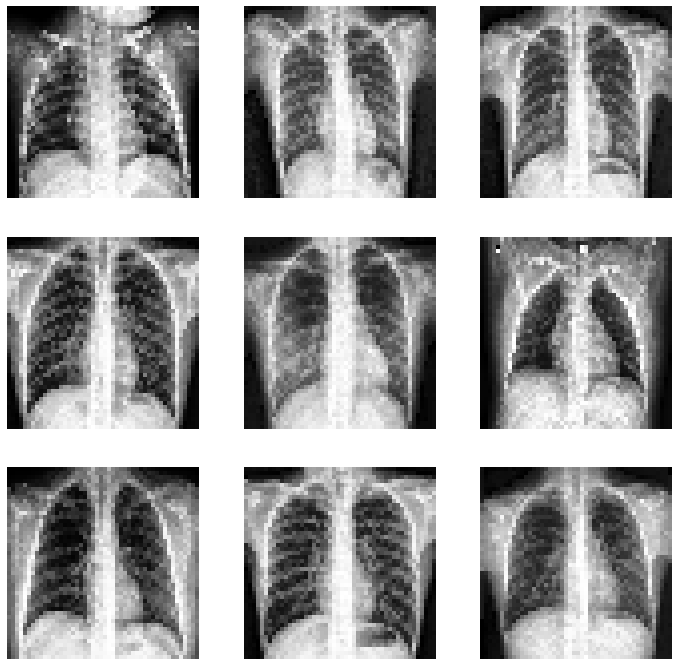

In [5]:
class_1 = 'Healthy'
picture_size = 48

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_train+class_1+"/"+ os.listdir(folder_train + class_1)[i], 
                   target_size=(picture_size, picture_size))
    plt.imshow(img) 
    plt.axis('off')
plt.show()



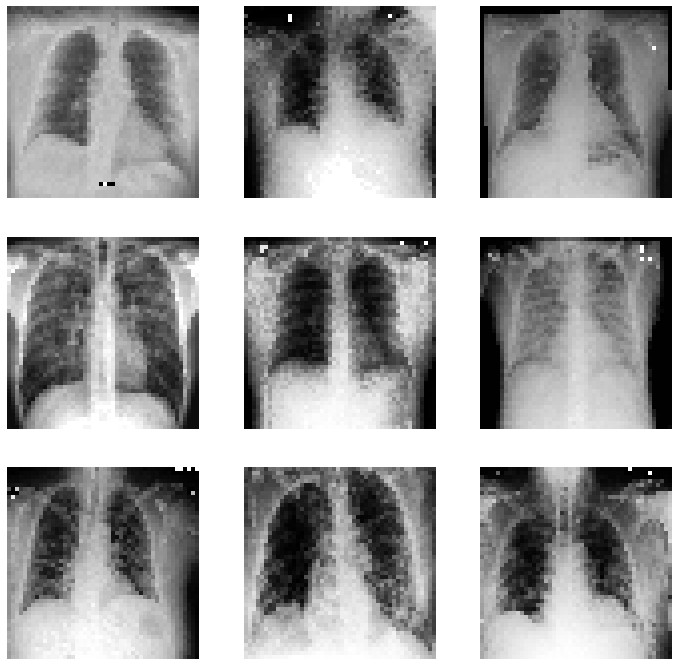

In [6]:
class_2 = 'Type 1 disease'
picture_size = 48

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_train+class_2+"/"+ os.listdir(folder_train + class_2)[i], 
                   target_size=(picture_size, picture_size))
    plt.imshow(img) 
    plt.axis('off')
plt.show()



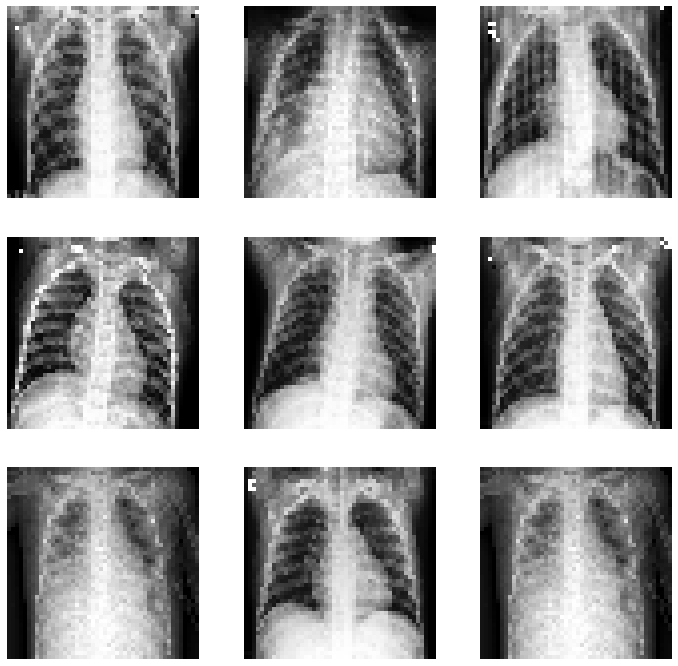

In [7]:
class_3 = 'Type 2 disease'
picture_size = 48

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_train+class_3+"/"+ os.listdir(folder_train + class_3)[i], 
                   target_size=(picture_size, picture_size))
    plt.imshow(img) 
    plt.axis('off')
plt.show()



### 4. Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

In [8]:
train_dir = base_path+'\\train\\'
test_dir = base_path+'\\test\\'

train_healthy_dir = train_dir+'\\Healthy\\'
train_Type1disease_dir = train_dir+'\\Type 1 disease\\'
train_Type2disease_dir = train_dir+'\\Type 2 disease\\'

test_healthy_dir = test_dir+'\\Healthy\\'
test_Type1disease_dir = test_dir+'\\Type 1 disease\\'
test_Type2disease_dir = test_dir+'\\Type 2 disease\\'

dir_list = [train_healthy_dir,train_Type1disease_dir,train_Type2disease_dir,test_healthy_dir,test_Type1disease_dir,
           test_Type2disease_dir]

for d in dir_list:
    print(d,len(glob(d+'*')))

C:\Users\shaz5\Desktop\Learn\AI\Course\Class 6 Computer Vision\Project\Detection_of_Lung_Infection\data\train\\Healthy\ 70
C:\Users\shaz5\Desktop\Learn\AI\Course\Class 6 Computer Vision\Project\Detection_of_Lung_Infection\data\train\\Type 1 disease\ 111
C:\Users\shaz5\Desktop\Learn\AI\Course\Class 6 Computer Vision\Project\Detection_of_Lung_Infection\data\train\\Type 2 disease\ 70
C:\Users\shaz5\Desktop\Learn\AI\Course\Class 6 Computer Vision\Project\Detection_of_Lung_Infection\data\test\\Healthy\ 20
C:\Users\shaz5\Desktop\Learn\AI\Course\Class 6 Computer Vision\Project\Detection_of_Lung_Infection\data\test\\Type 1 disease\ 26
C:\Users\shaz5\Desktop\Learn\AI\Course\Class 6 Computer Vision\Project\Detection_of_Lung_Infection\data\test\\Type 2 disease\ 20


In [9]:
# image generator

train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                                                 rotation_range = 90, 
                                                      zoom_range =0.2, 
                                                      shear_range = 0.2,
                                                      horizontal_flip = True, 
                                                      vertical_flip =True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(48,48),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 251 images belonging to 3 classes.


### 5. Build a data augmentation for test data to create new data and rescale the image at 48x48

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                             target_size=(48,48),
                                                             batch_size=32,
                                                             class_mode='categorical')

Found 66 images belonging to 3 classes.


## Build 3 CNN model with:

### 1. CNN Architecture:

#### 1. Add convolutional layers with different filters, max pool layers, dropout layers, and batch normalization layers  

#### 2. Use Relu as an activation function


In [11]:
# Create Sequential Layer

model_cnn = Sequential()

# Create First Convolution Layer:

model_cnn.add(Conv2D(16,(3,3),activation='relu',input_shape=(48,48,3)))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.25))

# Create Second Convolution Layer:

model_cnn.add(Conv2D(32,(3,3),activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.25))

# Create Third Convolution Layer:
model_cnn.add(Conv2D(64,(3,3),activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.25))

# 4th CNN Layer
model_cnn.add(Conv2D(64,(3,3),activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Dropout(0.25))

# Flatten Layer
model_cnn.add(Flatten())

# Fully connected layer
model_cnn.add(Dense(512,activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.25))

model_cnn.add(Dense(3,activation='softmax'))

##### Compiling the CNN

#### 3. Take the loss function as categorical cross-entropy

#### 4. Take rmsprop as an optimizer

In [12]:
model_cnn.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

In [13]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 32)       1

##### 5. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy

In [14]:
early_stopping = EarlyStopping(patience=2,monitor='val_loss',restore_best_weights=True)

### Fit and Train the model

##### 6. Try with ten numbers epoch

##### 7. Train the model using a generator and test the accuracy of the test data at every epoch

In [15]:
# Fit the model
history_cnn = model_cnn.fit(x = train_generator,
                            epochs=10,
                            batch_size=512,
                            verbose=1,
                            validation_data=test_generator,
                            callbacks=early_stopping)

Epoch 1/10
8/8 [==============================] - 15s 2s/step - loss: 1.2012 - accuracy: 0.5498 - val_loss: 1.1374 - val_accuracy: 0.3030
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 0.8680 - accuracy: 0.6375 - val_loss: 1.2134 - val_accuracy: 0.3030
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 0.8779 - accuracy: 0.6335 - val_loss: 1.3200 - val_accuracy: 0.3030


### Evaluate the result

##### 8. Plot the training and validation accuracy, and the loss

##### 9. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [16]:
#Find Model Accuracy and Loss:

test_loss, test_acc = model_cnn.evaluate(test_generator,verbose=2)

print('Model Accuracy:',test_acc)
print('Model Loss:',test_loss)

3/3 - 2s - loss: 1.1374 - accuracy: 0.3030 - 2s/epoch - 540ms/step
Model Accuracy: 0.3030303120613098
Model Loss: 1.1373958587646484


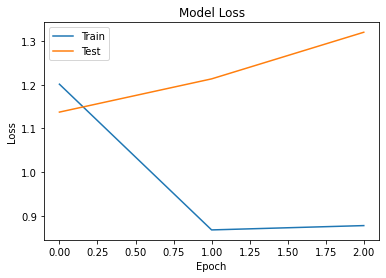

In [17]:
# PLot the model loss
plt.plot(history_cnn.history['loss'],label='Train')
plt.plot(history_cnn.history['val_loss'],label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

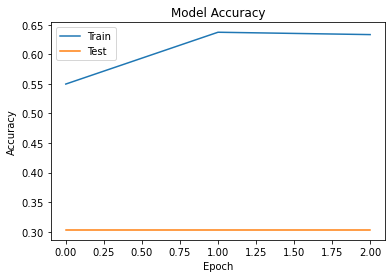

In [18]:
# PLot the model Accuracy
plt.plot(history_cnn.history['accuracy'],label='Train')
plt.plot(history_cnn.history['val_accuracy'],label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

### 2. Transfer learning using mobile net:

##### 1. Prepare data for the pre-trained mobile net model, with color mode as RGB

##### 2. Create an instance of a mobile net pre-trained model

#### 3. Add dense layer, dropout layer, batch normalization layer on the pre-trained model

#### 4. Create a final output layer with a SoftMax activation function

In [19]:
IMAGE_SIZE = (224, 224,3)

In [20]:
# Create Model mobile net

mobilenet = MobileNetV2(input_shape=IMAGE_SIZE, weights='imagenet', include_top=True)

In [21]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [22]:
# Create FLatten Layer
flatten_mobilenet = Flatten()(mobilenet.output)

# Create output Layer -- n number of hiddden layer can be created 
prediction_mobilenet = Dense(len(folders), activation='softmax')(flatten_mobilenet)


model_mobilenet = Model(inputs=mobilenet.input, outputs=prediction_mobilenet)

In [23]:
# view the structure of the model
model_mobilenet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

#### 5. Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases

#### 6. Take the loss function as categorical cross-entropy

#### 7. Use early stopping with the patience of two epoch and call back function for preventing overfitting

#### Try with ten numbers epoch

#### Train the model using a generator and test the accuracy of the test data at every epoch

#### Plot the training and validation accuracy, and the loss

#### Observe the precision, recall the F1-score for all classes for both grayscale

#### and color models, and determine if the model’s classes are good

In [24]:
# tell the model what cost and optimization method to use
model_mobilenet.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
early_stopping = EarlyStopping(patience=2,monitor='val_loss',restore_best_weights=True)

In [26]:
batch_size=np.int16(32)
history_mobilenet = model_mobilenet.fit(train_generator,
                                        epochs=10,
                                        verbose=2,
                                        batch_size=batch_size,
                                        validation_data=test_generator,
                                        callbacks=early_stopping,
                                        steps_per_epoch= len(train_generator.filenames)//batch_size, # int(round(2/32)), #len(trainImagedata.filenames)/trainImagedata.batch_size, # no_of_images_in_raining_set/batch_size
                                         validation_steps = len(test_generator.filenames)//batch_size #int(round(2/32)) #len(ValImagedata.filenames)/ValImagedata.batch_size
    )

Epoch 1/10
7/7 - 17s - loss: 1.0977 - accuracy: 0.4064 - val_loss: 1.0993 - val_accuracy: 0.3125 - 17s/epoch - 2s/step
Epoch 2/10
7/7 - 11s - loss: 1.0953 - accuracy: 0.4521 - val_loss: 1.0996 - val_accuracy: 0.3125 - 11s/epoch - 2s/step
Epoch 3/10
7/7 - 10s - loss: 1.0931 - accuracy: 0.4612 - val_loss: 1.1009 - val_accuracy: 0.2969 - 10s/epoch - 1s/step


In [27]:
# Evaluate the result
test_loss, test_acc = model_mobilenet.evaluate(test_generator,verbose=2)

print('Model Accuracy:',test_acc)
print('Model Loss:',test_loss)

3/3 - 1s - loss: 1.0996 - accuracy: 0.3030 - 1s/epoch - 487ms/step
Model Accuracy: 0.3030303120613098
Model Loss: 1.0995683670043945


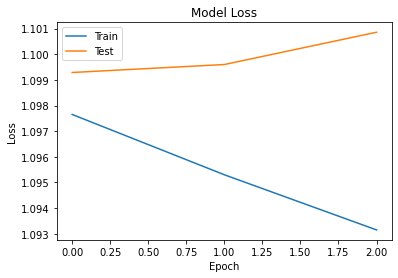

In [28]:
# PLot the model loss
plt.plot(history_mobilenet.history['loss'],label='Train')
plt.plot(history_mobilenet.history['val_loss'],label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

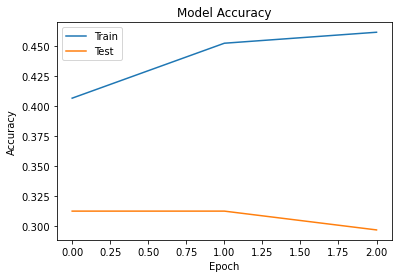

In [29]:
# PLot the model Accuracy
plt.plot(history_mobilenet.history['accuracy'],label='Train')
plt.plot(history_mobilenet.history['val_accuracy'],label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

### 3. Transfer Learning using Densenet121:

#### Prepare the dataset for the transfer learning algorithm using Densenet121 with the image size as 224x224x3

#### Freeze the top layers of the pre-trained model

#### Add a dense layer at the end of the pre-trained model followed by a dropout layer and try various combinations to get an accuracy

#### Add the final output layer with a SoftMax activation function

#### Take loss function as categorical cross-entropy

#### Take Adam as an optimizer

#### Use early stopping to prevent overfitting

#### Try with 15 number of epoch and batch size with seven, also try various values to see the impact on results

#### Train the model using the generator and test the accuracy of the test data at every epoch

#### Plot the training and validation accuracy, and the loss

#### Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [30]:
IMAGE_SIZE = (224, 224,3)

In [31]:
# Create Model mobile net

denseNet = DenseNet121(input_shape=IMAGE_SIZE, weights='imagenet', include_top=True)

In [32]:
# don't train existing weights
for layer in denseNet.layers:
    layer.trainable = False

In [33]:
# our layers - you can add more if you want
Flatten_densenet = Flatten()(denseNet.output)
prediction_densenet = Dense(len(folders), activation='softmax')(Flatten_densenet)

# create a model object
model_densenet = Model(inputs=denseNet.input, outputs=prediction_densenet)
# view the structure of the model
model_densenet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 14, 14, 1024  0           ['pool4_bn[0][0]']               
          

                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block13_1_relu[0][0]']   
          

                                                                                                  
Total params: 8,065,507
Trainable params: 3,003
Non-trainable params: 8,062,504
__________________________________________________________________________________________________


In [34]:
# tell the model what cost and optimization method to use
model_densenet.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

early_stopping = EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True)



In [35]:
batch_size=np.int16(32)


history_densenet = model_densenet.fit(train_generator,
                            epochs=15,
                            verbose=1,
                            batch_size=batch_size,
                            callbacks=early_stopping,
                            validation_data=test_generator,
                            steps_per_epoch= len(train_generator.filenames)//batch_size, # int(round(2/32)), #len(trainImagedata.filenames)/trainImagedata.batch_size, # no_of_images_in_raining_set/batch_size
                            validation_steps = len(test_generator.filenames)//batch_size #int(round(2/32)) #len(ValImagedata.filenames)/ValImagedata.batch_size
)

Epoch 1/15
7/7 [==============================] - 29s 3s/step - loss: 1.0986 - accuracy: 0.4292 - val_loss: 1.1019 - val_accuracy: 0.2656
Epoch 2/15
7/7 [==============================] - 12s 2s/step - loss: 1.0947 - accuracy: 0.4598 - val_loss: 1.1029 - val_accuracy: 0.3125
Epoch 3/15
7/7 [==============================] - 12s 2s/step - loss: 1.0928 - accuracy: 0.4475 - val_loss: 1.1039 - val_accuracy: 0.2969
Epoch 4/15
7/7 [==============================] - 12s 2s/step - loss: 1.0881 - accuracy: 0.4521 - val_loss: 1.1045 - val_accuracy: 0.3281
Epoch 5/15
7/7 [==============================] - 11s 2s/step - loss: 1.0827 - accuracy: 0.4703 - val_loss: 1.1038 - val_accuracy: 0.3281
Epoch 6/15
7/7 [==============================] - 11s 2s/step - loss: 1.0820 - accuracy: 0.4521 - val_loss: 1.1052 - val_accuracy: 0.3125


In [36]:
# Evaluate the result
test_loss, test_acc = model_densenet.evaluate(test_generator,verbose=1)

print('Model Accuracy:',test_acc)
print('Model Loss:',test_loss)

3/3 [==============================] - 2s 408ms/step - loss: 1.1022 - accuracy: 0.2576
Model Accuracy: 0.25757575035095215
Model Loss: 1.1021772623062134


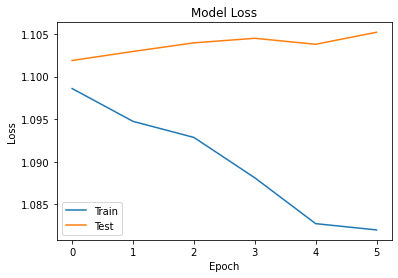

In [37]:
# PLot the model loss
plt.plot(history_densenet.history['loss'],label='Train')
plt.plot(history_densenet.history['val_loss'],label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

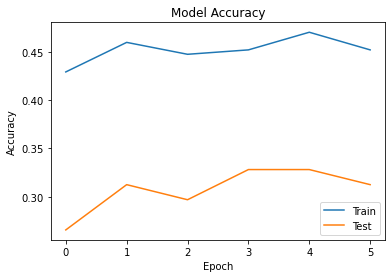

In [38]:
# PLot the model Accuracy
plt.plot(history_densenet.history['accuracy'],label='Train')
plt.plot(history_densenet.history['val_accuracy'],label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

## Final step:

### Compare all the models on the basis of accuracy, precision, recall, and f1-score

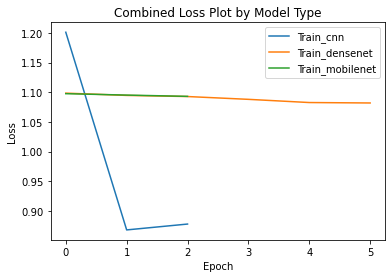

In [39]:
# Plot the all loss result on one graph
plt.plot(history_cnn.history['loss'])
plt.plot(history_densenet.history['loss'])
plt.plot(history_mobilenet.history['loss'])

plt.title('Combined Loss Plot by Model Type')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_cnn','Train_densenet','Train_mobilenet'],loc='best')
plt.show()

#### Combined the Accuracy PLot

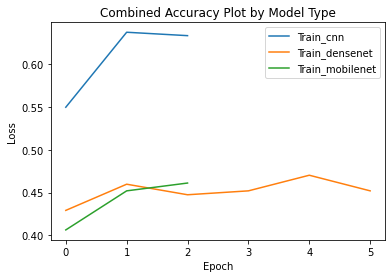

In [40]:
# Plot the all loss result on one graph
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_densenet.history['accuracy'])
plt.plot(history_mobilenet.history['accuracy'])

plt.title('Combined Accuracy Plot by Model Type')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_cnn','Train_densenet','Train_mobilenet'],loc='best')
plt.show()

#### Combine the loss plot

3/3 [==============================] - 2s 353ms/step
Confusion Matrix
[[ 0 26  0]
 [ 0 20  0]
 [ 0 20  0]]


Text(33.0, 0.5, 'Truth')

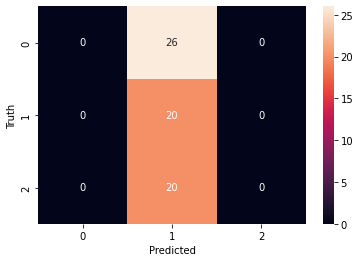

In [41]:
# CNN model:-

y_pred = model_cnn.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
print(classification_report(test_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.30      1.00      0.47        20
           2       0.00      0.00      0.00        20

    accuracy                           0.30        66
   macro avg       0.10      0.33      0.16        66
weighted avg       0.09      0.30      0.14        66



3/3 [==============================] - 3s 430ms/step
Confusion Matrix
[[ 0 26  0]
 [ 0 20  0]
 [ 0 20  0]]


Text(24.0, 0.5, 'Truth')

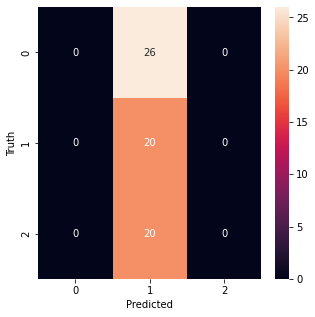

In [45]:
# MobileNet Pretrained Model:-

y_pred_mobilenet = model_mobilenet.predict(test_generator)
y_pred_mobilenet = np.argmax(y_pred_mobilenet, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_mobilenet))
cm = confusion_matrix(test_generator.classes, y_pred_mobilenet)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
print(classification_report(test_generator.classes,y_pred_mobilenet))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.30      1.00      0.47        20
           2       0.00      0.00      0.00        20

    accuracy                           0.30        66
   macro avg       0.10      0.33      0.16        66
weighted avg       0.09      0.30      0.14        66



3/3 [==============================] - 4s 400ms/step
Confusion Matrix
[[12  9  5]
 [10  6  4]
 [10  9  1]]


Text(33.0, 0.5, 'Truth')

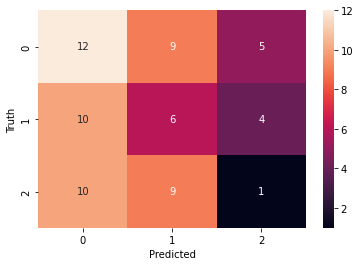

In [43]:
# DenseNet Pretrained model:-

y_pred_densenet = model_densenet.predict(test_generator)
y_pred_densenet = np.argmax(y_pred_densenet, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_densenet))
cm = confusion_matrix(test_generator.classes, y_pred_densenet)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
print(classification_report(test_generator.classes,y_pred_densenet))

              precision    recall  f1-score   support

           0       0.38      0.46      0.41        26
           1       0.25      0.30      0.27        20
           2       0.10      0.05      0.07        20

    accuracy                           0.29        66
   macro avg       0.24      0.27      0.25        66
weighted avg       0.25      0.29      0.27        66

